In [1]:
import pandas as pd  #for data manipulation operations
import numpy as np   #for linear algebra

#Libraries for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle

In [2]:
stocks = pd.read_csv('combine_stocks3.csv')
stocks.set_index('Date',inplace=True)
stocks.head()

,Unnamed: 0,Tesla_Close,Tesla_Volume,Tesla_Open,Tesla_High,Tesla_Low,Lucid_Close,Lucid_Volume,Lucid_Open,Lucid_High,Lucid_Low
Date,,,,,,,,,,,
2023-11-03,1,219.96,119534800,221.15,226.3701,218.40,4.62,32179100.0,4.660,4.850,4.55
2023-11-02,2,218.51,125987600,212.97,219.2000,211.45,4.54,47135750.0,4.130,4.615,4.12
2023-11-01,3,205.66,121661700,204.04,205.9900,197.85,4.05,21911580.0,4.130,4.140,3.96
2023-10-31,4,200.84,118068300,196.12,202.8000,194.07,4.12,20320210.0,4.065,4.175,4.04
2023-10-30,5,197.36,136448200,209.28,210.8800,194.67,4.07,18462870.0,4.100,4.140,4.00


In [3]:
print('Number of days present in the dataset: ',stocks.shape[0])
print('Number of fields present in the dataset: ',stocks.shape[1])

Number of days present in the dataset:  2517
Number of fields present in the dataset:  11


In [4]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2517 entries, 2023-11-03 to 2013-11-05
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2517 non-null   int64  
 1   Tesla_Close   2517 non-null   float64
 2   Tesla_Volume  2517 non-null   int64  
 3   Tesla_Open    2517 non-null   float64
 4   Tesla_High    2517 non-null   float64
 5   Tesla_Low     2517 non-null   float64
 6   Lucid_Close   788 non-null    float64
 7   Lucid_Volume  788 non-null    float64
 8   Lucid_Open    788 non-null    float64
 9   Lucid_High    788 non-null    float64
 10  Lucid_Low     788 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 236.0+ KB


In [5]:
stocks.describe()

,Unnamed: 0,Tesla_Close,Tesla_Volume,Tesla_Open,Tesla_High,Tesla_Low,Lucid_Close,Lucid_Volume,Lucid_Open,Lucid_High,Lucid_Low
count,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000,788.000000,7.880000e+02,788.000000,788.000000,788.000000
mean,1259.000000,90.557545,1.141033e+08,90.587024,92.647332,88.419841,17.728530,2.951672e+07,17.733502,18.442892,17.033390
std,726.739637,107.439918,7.678189e+07,107.536632,110.039073,104.854891,10.838624,3.233616e+07,10.796579,11.482529,10.163405
min,1.000000,8.033300,1.065415e+07,7.958700,8.181300,7.740000,4.040000,4.454500e+04,4.065000,4.140000,3.960000
25%,630.000000,15.496700,6.627384e+07,15.532700,15.775300,15.250000,8.525000,1.293917e+07,8.500000,8.728750,8.148250
50%,1259.000000,21.340000,9.311551e+07,21.278700,21.683300,20.953300,16.990000,2.100264e+07,17.027500,17.624950,16.215000
75%,1888.000000,191.300000,1.339584e+08,191.666600,196.520000,186.340000,23.782500,3.355636e+07,23.900000,24.485000,22.800000
max,2517.000000,409.970000,9.140809e+08,411.470000,414.496600,405.666600,58.050000,3.772209e+08,62.870000,64.860000,56.080000


In [6]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [7]:
stocks.isnull().sum()

Unnamed: 0         0
Tesla_Close        0
Tesla_Volume       0
Tesla_Open         0
Tesla_High         0
Tesla_Low          0
Lucid_Close     1729
Lucid_Volume    1729
Lucid_Open      1729
Lucid_High      1729
Lucid_Low       1729
dtype: int64

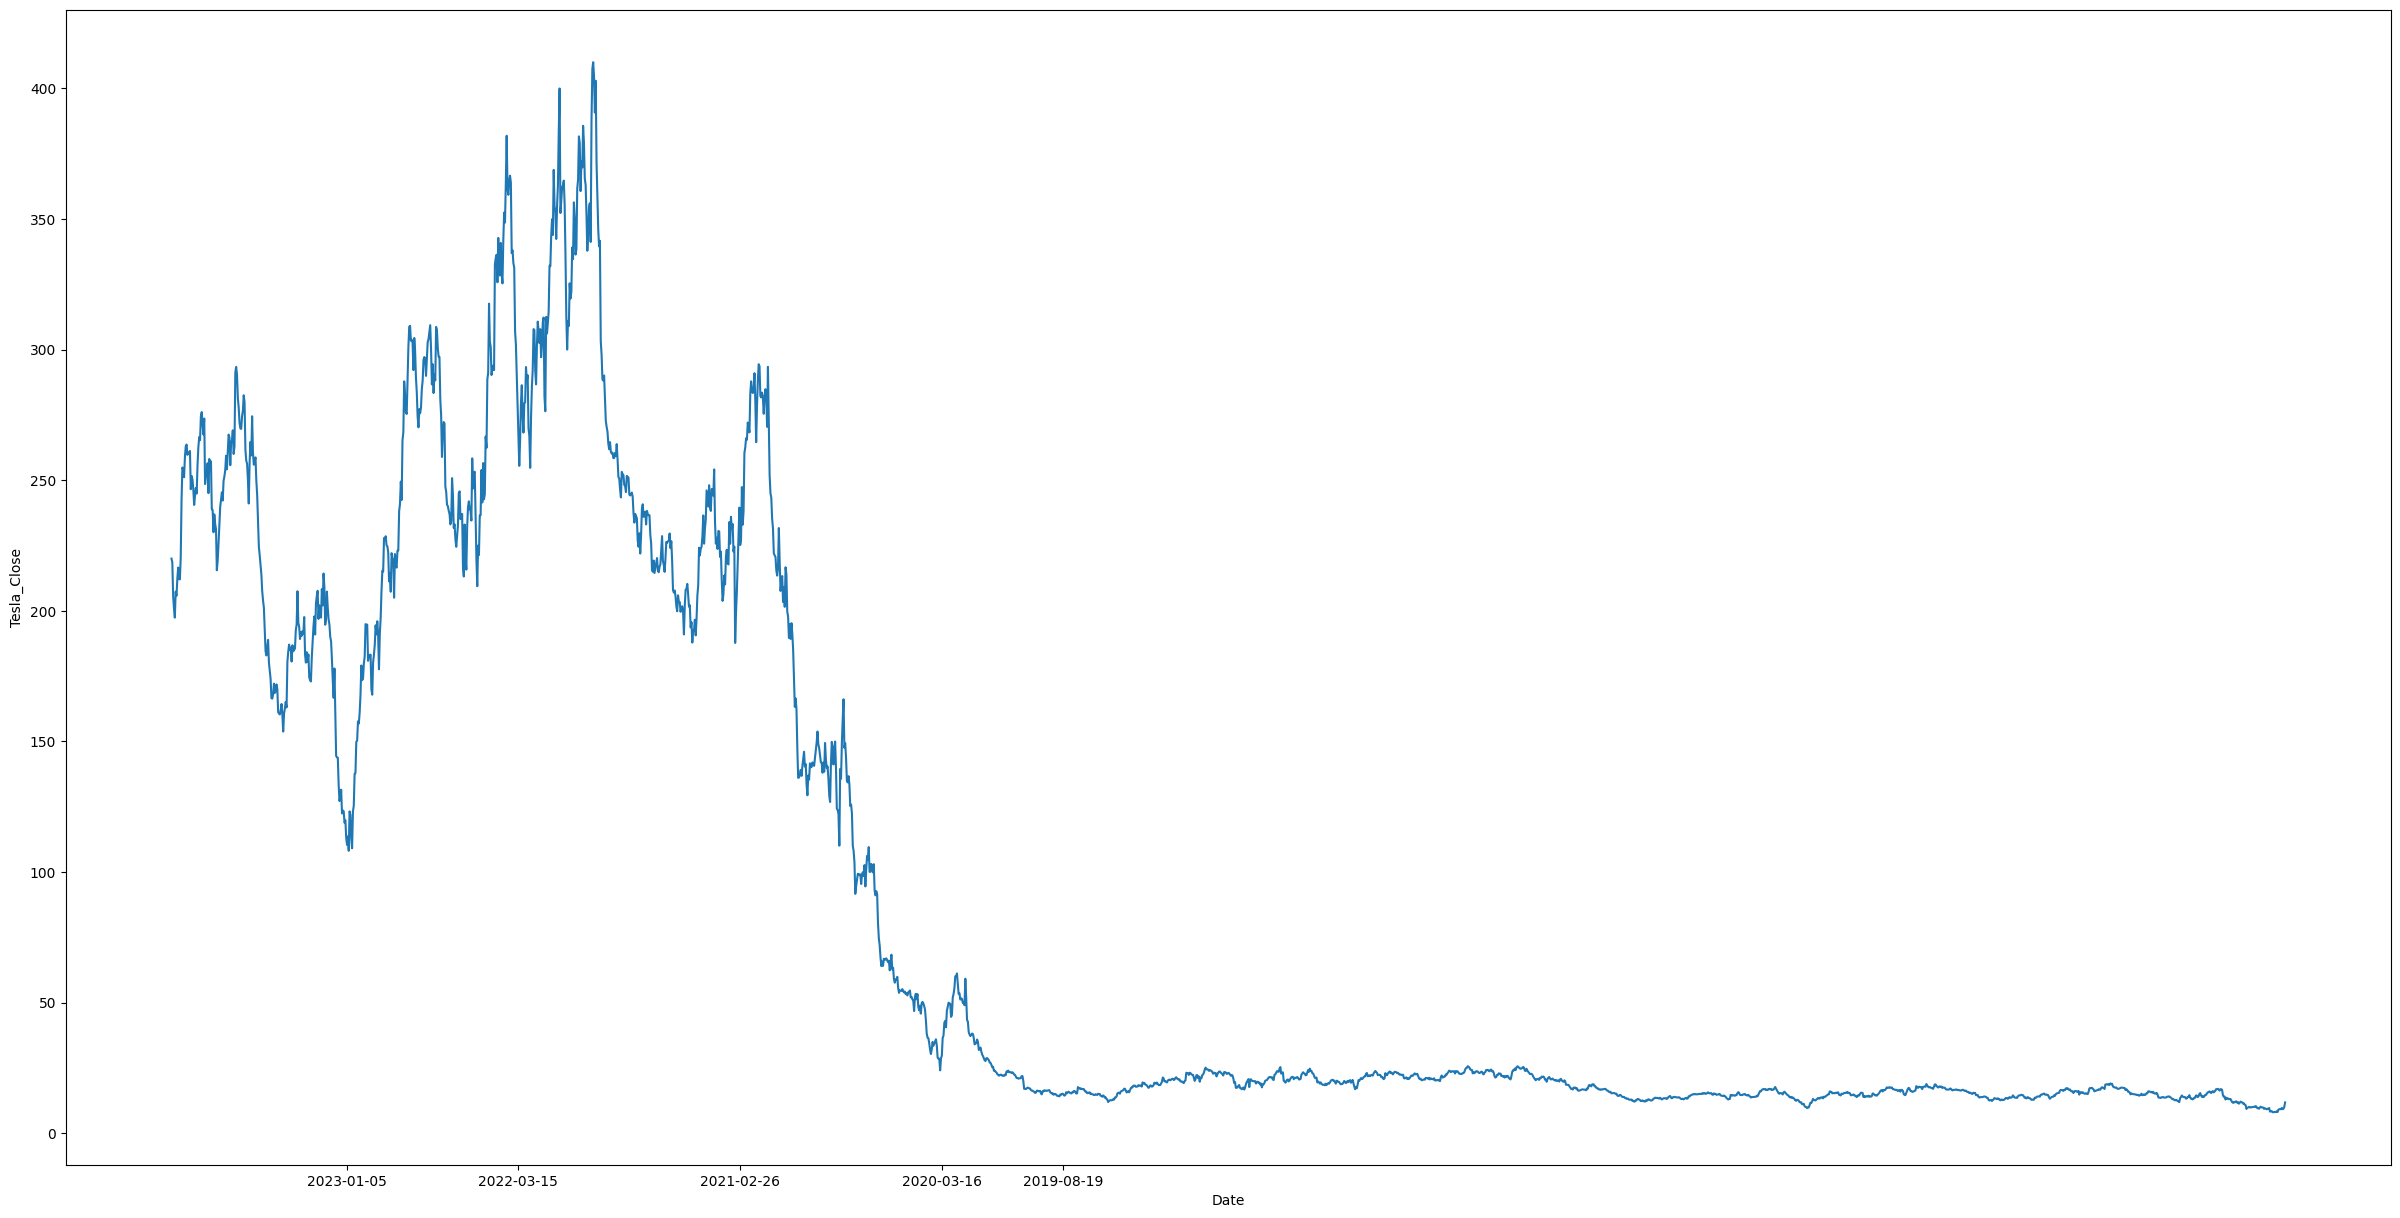

In [8]:
plt.figure(figsize=(30,15))
ax=sns.lineplot(x=stocks.index,y=stocks['Tesla_Close'])
# plt.xticks(['2023-11-03','2020-03-16','2021-02-26','2022-03-15','2023-05-01','2013-11-05'])
plt.xticks(['2019-08-19','2020-03-16','2021-02-26','2022-03-15','2023-01-05'])
plt.show()

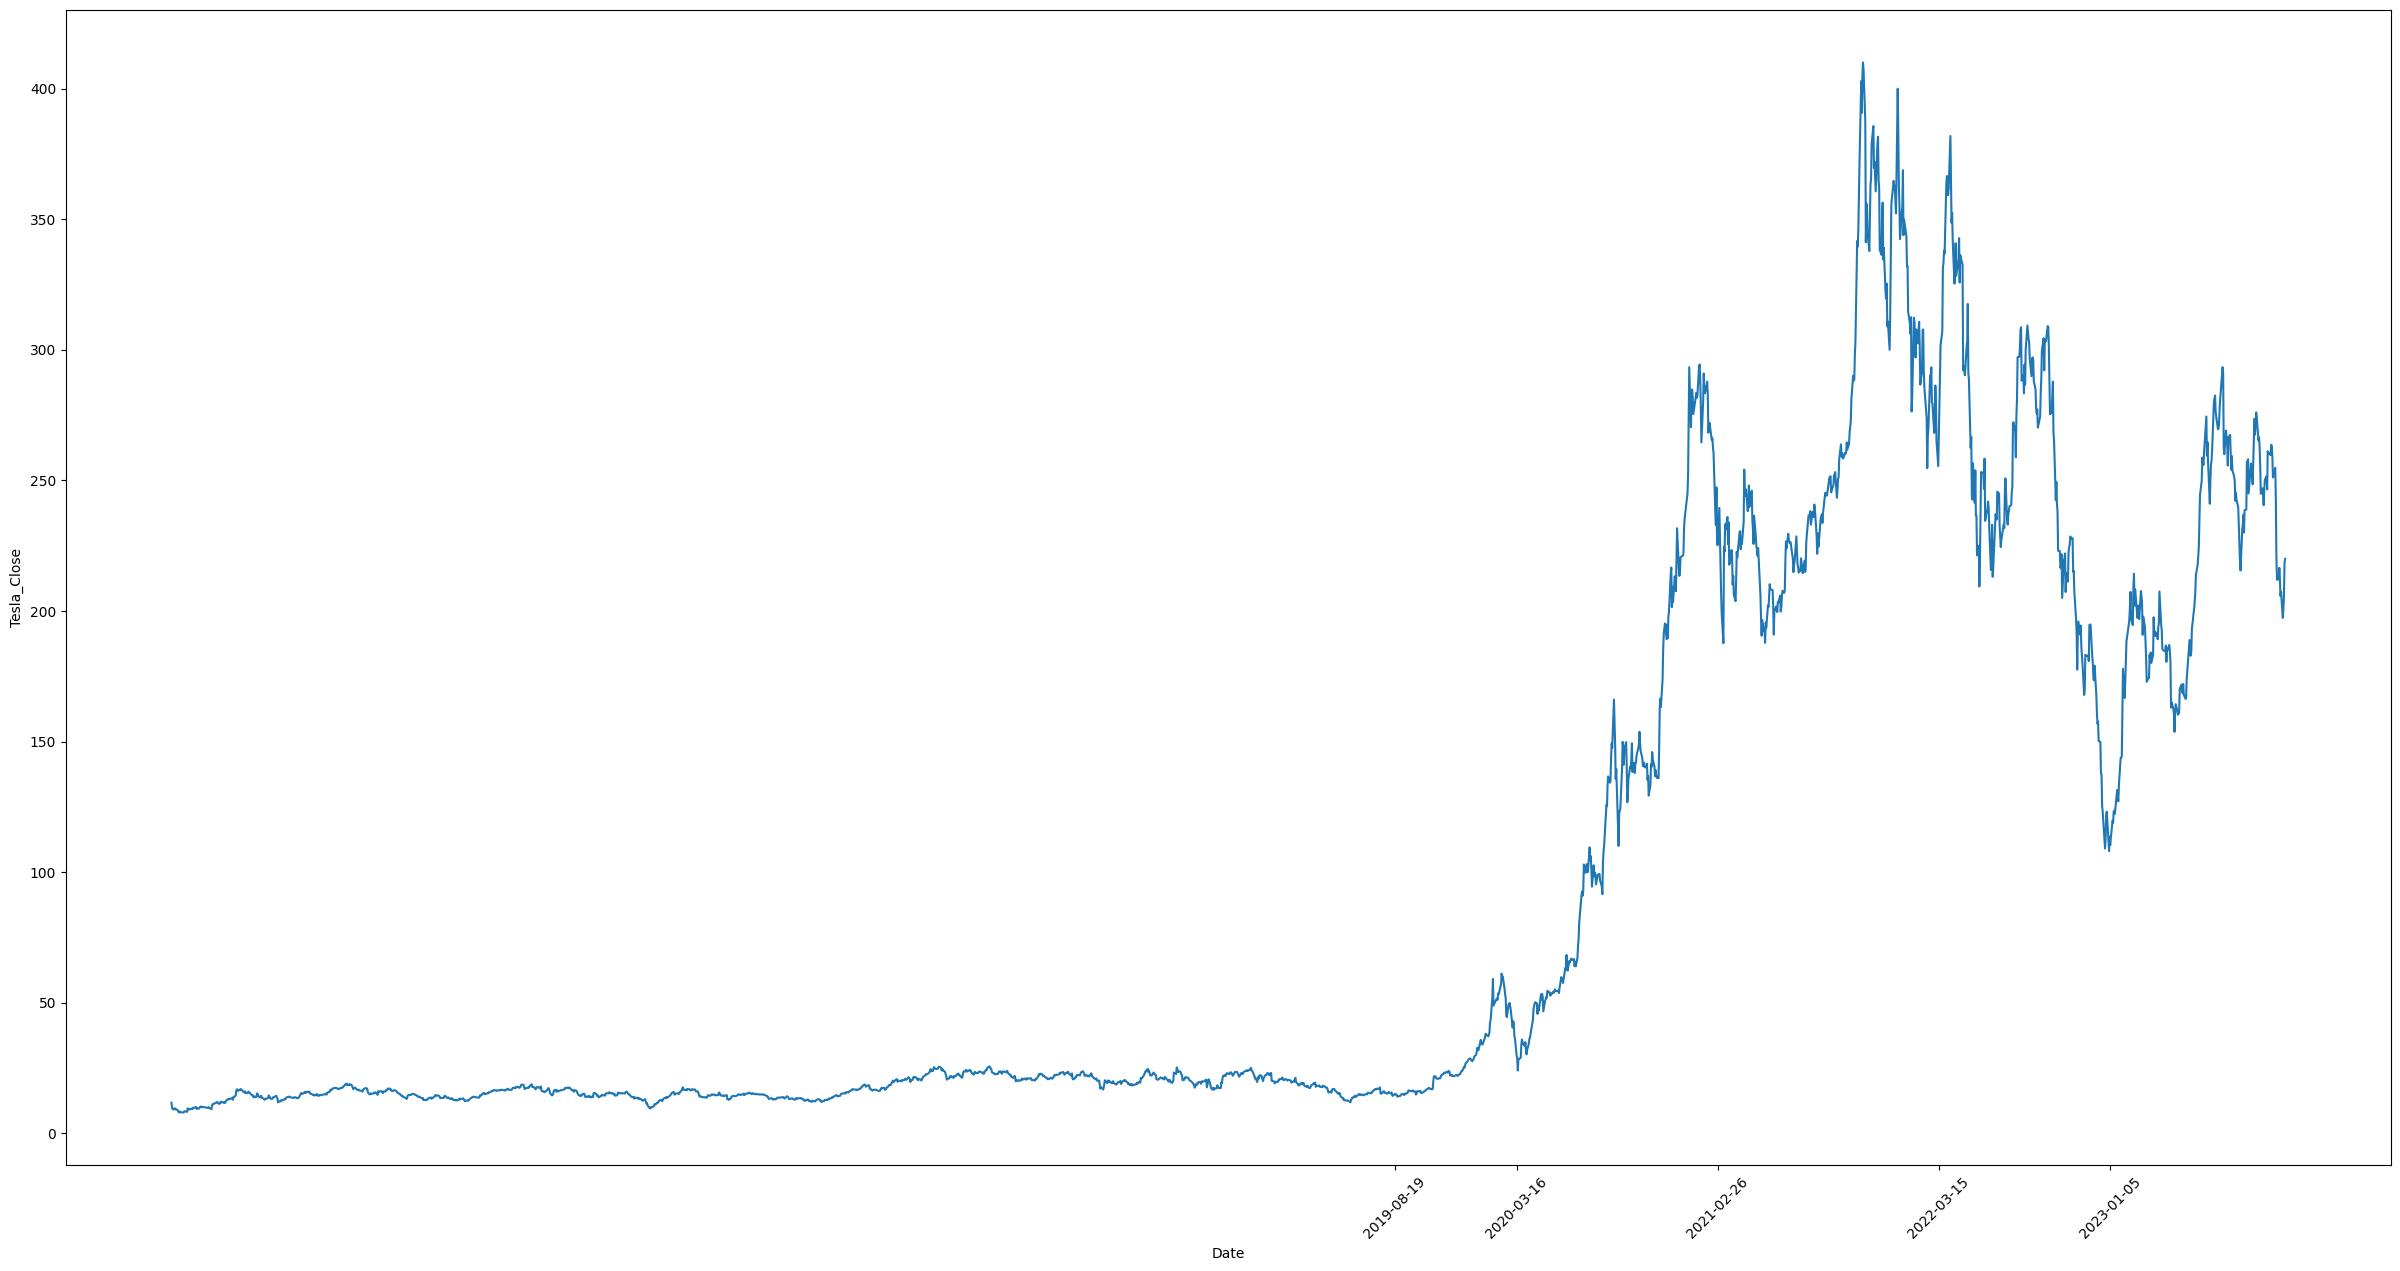

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the index to a DatetimeIndex if it's not already
stocks.index = pd.to_datetime(stocks.index)

plt.figure(figsize=(30,15))
ax = sns.lineplot(x=stocks.index, y=stocks['Tesla_Close'])

# Define the dates for the x-ticks and ensure they are parsed as datetime objects
xticks_dates = ['2019-08-19', '2020-03-16', '2021-02-26', '2022-03-15', '2023-01-05']
xticks_dates = pd.to_datetime(xticks_dates)

# Set the x-ticks
plt.xticks(xticks_dates)

# Optional: Rotate the x-tick labels if they overlap
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [10]:
names = cycle(['Stock Open Price','Stock High Price','Stock Low Price','Stock Close Price'])

fig = px.line(stocks, x=stocks.index, y=[stocks['Tesla_Open'],stocks['Tesla_High'], stocks['Tesla_Low'],stocks['Tesla_Close']],
             labels={'date': 'Date','value':'Stock Value'})
fig.update_layout(title_text='Stock Analysis', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.show()

In [11]:
ma_day = [10, 50, 200]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        stocks[column_name] = stocks['Tesla_Close'].rolling(ma).mean()

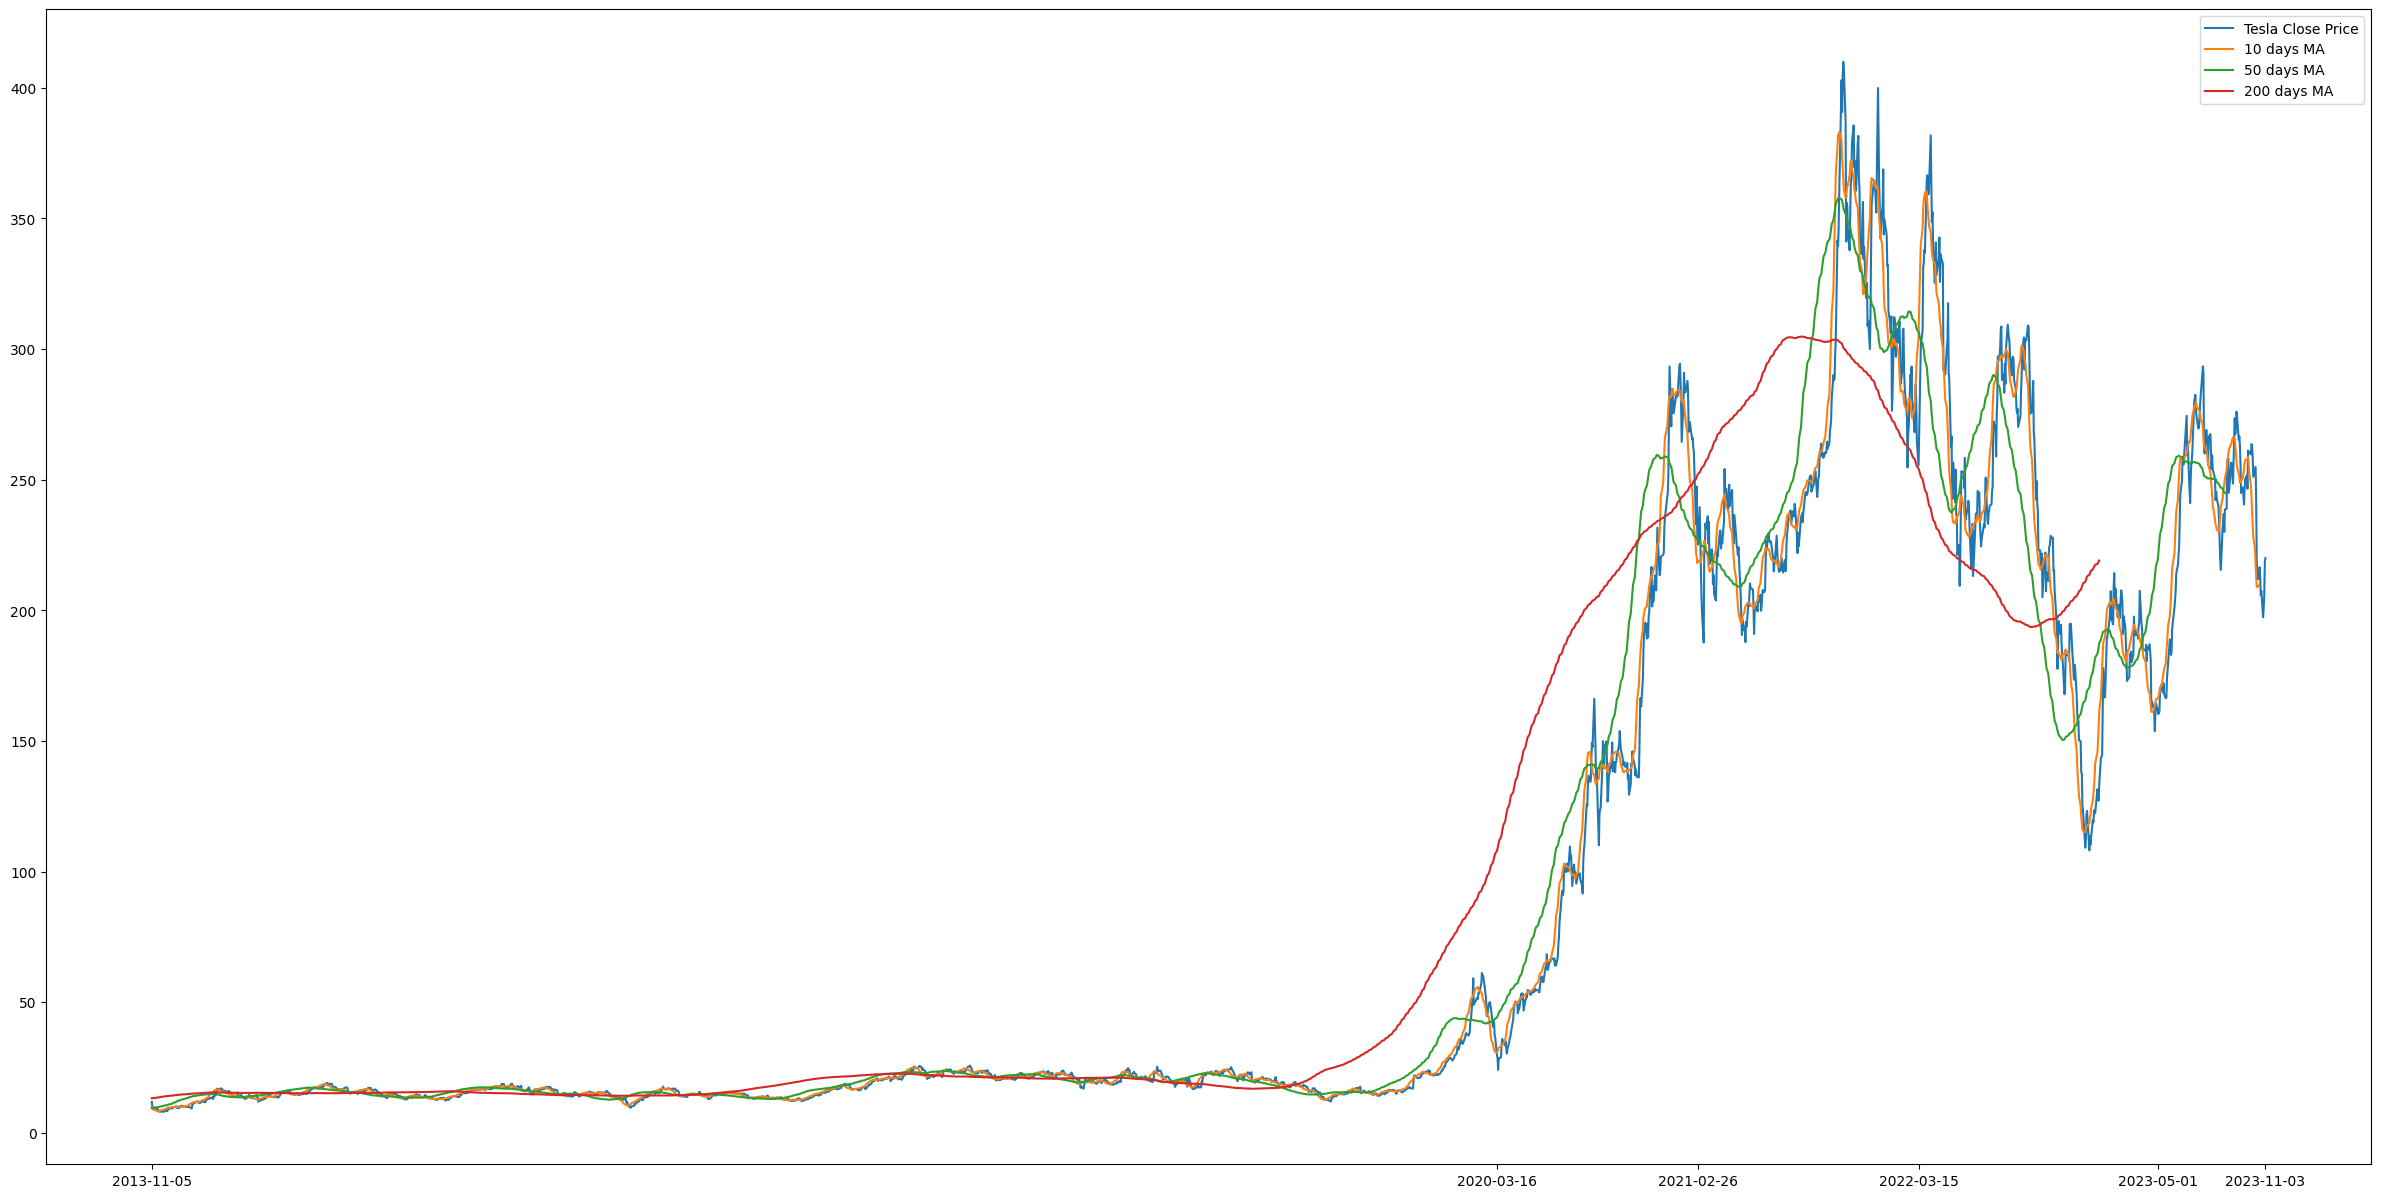

In [12]:
plt.figure(figsize=(30,15))
plt.plot(stocks['Tesla_Close'],label='Tesla Close Price')
plt.plot(stocks['MA for 10 days'],label='10 days MA')
plt.plot(stocks['MA for 50 days'],label='50 days MA')
plt.plot(stocks['MA for 200 days'],label='200 days MA')
plt.xticks(['2023-11-03','2020-03-16','2021-02-26','2022-03-15','2023-05-01','2013-11-05'])
plt.legend()
plt.show()

In [13]:
# Creating a new dataframe with only 'Tesla_Close'
tesla_close_df = stocks['Tesla_Close']
tesla_close_df.index = stocks.index

tesla_close_final_df=tesla_close_df.values

train_data=tesla_close_final_df[0:2013,]
test_data=tesla_close_final_df[2013:,]

train_df = pd.DataFrame()
test_df = pd.DataFrame()

train_df['Tesla_Close'] = train_data
train_df.index = tesla_close_df[0:2013].index
test_df['Tesla_Close'] = test_data
test_df.index = tesla_close_df[2013:].index

In [14]:
print("train_data: ", train_df.shape)
print("test_data: ", test_df.shape)

train_data:  (2013, 1)
test_data:  (504, 1)


In [26]:
# Using Min-Max scaler to scale data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(tesla_close_final_df.reshape(-1,1))

X_train_data,y_train_data=[],[]

for i in range(2012,len(train_df)):
    X_train_data.append(scaled_data[i-2012:i,0])
    y_train_data.append(scaled_data[i,0])

X_train_data,y_train_data=np.array(X_train_data),np.array(y_train_data)

X_train_data=np.reshape(X_train_data,(X_train_data.shape[0],X_train_data.shape[1],1))

In [27]:
# Initializing the LSTM model
model_tesla = Sequential()
model_tesla.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_data.shape[1], 1)))
model_tesla.add(Dropout(0.2))
model_tesla.add(LSTM(units = 50, return_sequences = True))
model_tesla.add(Dropout(0.2))
model_tesla.add(LSTM(units = 50, return_sequences = True))
model_tesla.add(Dropout(0.2))
model_tesla.add(LSTM(units = 50))
model_tesla.add(Dropout(0.2))
model_tesla.add(Dense(units = 1))

In [28]:
model_tesla.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2012, 50)          10400     
                                                                 
 dropout_4 (Dropout)         (None, 2012, 50)          0         
                                                                 
 lstm_5 (LSTM)               (None, 2012, 50)          20200     
                                                                 
 dropout_5 (Dropout)         (None, 2012, 50)          0         
                                                                 
 lstm_6 (LSTM)               (None, 2012, 50)          20200     
                                                                 
 dropout_6 (Dropout)         (None, 2012, 50)          0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [29]:
model_tesla.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_tesla.fit(X_train_data, y_train_data, epochs = 150, batch_size = 32);

Epoch 1/150
1/1 [==============================] - 13s 13s/step - loss: 4.1262e-04
Epoch 2/150
1/1 [==============================] - 3s 3s/step - loss: 1.5839e-05
Epoch 3/150
1/1 [==============================] - 3s 3s/step - loss: 9.0518e-05
Epoch 4/150
1/1 [==============================] - 3s 3s/step - loss: 3.1168e-04
Epoch 5/150
1/1 [==============================] - 4s 4s/step - loss: 7.4435e-05
Epoch 6/150
1/1 [==============================] - 3s 3s/step - loss: 1.3632e-06
Epoch 7/150
1/1 [==============================] - 3s 3s/step - loss: 4.6519e-05
Epoch 8/150
1/1 [==============================] - 3s 3s/step - loss: 5.2462e-04
Epoch 9/150
1/1 [==============================] - 4s 4s/step - loss: 2.3964e-04
Epoch 10/150
1/1 [==============================] - 3s 3s/step - loss: 2.8708e-04
Epoch 11/150
1/1 [==============================] - 3s 3s/step - loss: 1.7827e-04
Epoch 12/150
1/1 [==============================] - 4s 4s/step - loss: 2.0829e-05
Epoch 13/150
1/1 [=====

In [19]:
input_data=tesla_close_df[len(tesla_close_df)-len(test_df)-60:].values
input_data=input_data.reshape(-1,1)
input_data=scaler.transform(input_data)

In [20]:
X_test=[]
for i in range(60,input_data.shape[0]):
    X_test.append(input_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [21]:
predicted=model_tesla.predict(X_test)
predicted=scaler.inverse_transform(predicted)

16/16 [==============================] - 3s 42ms/step


In [22]:
test_df['Predictions']=predicted

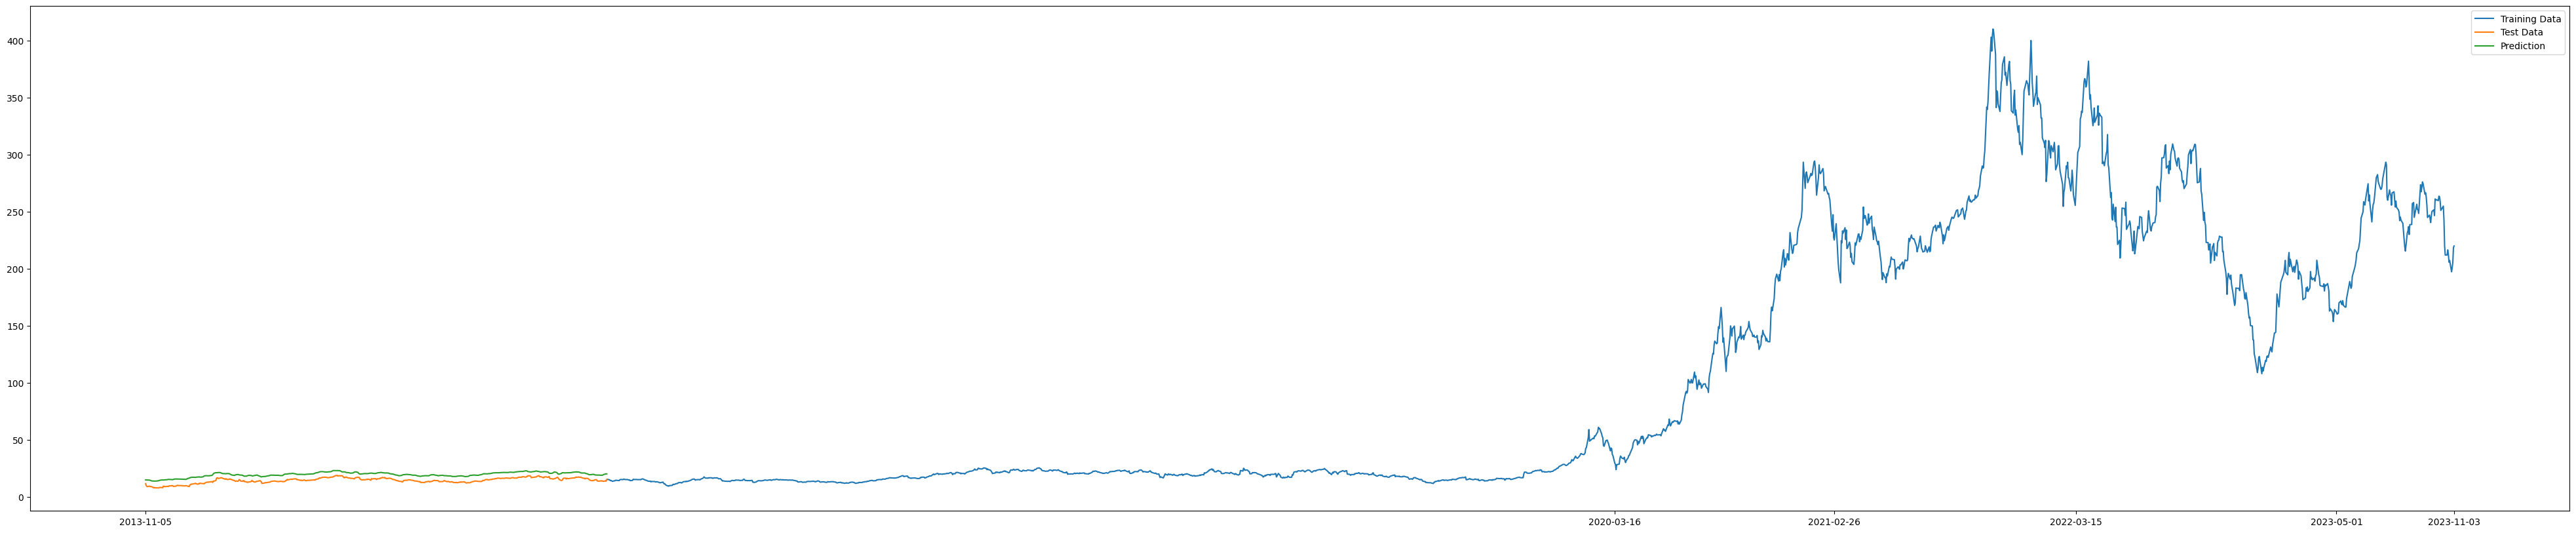

In [23]:
plt.figure(figsize=(50,10))
plt.plot(train_df['Tesla_Close'],label='Training Data')
plt.plot(test_df['Tesla_Close'],label='Test Data')
plt.plot(test_df['Predictions'],label='Prediction')
# plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
# plt.xticks(['2023-11-03','2020-03-16','2021-02-26','2022-03-15','2023-05-01','2013-11-05'])
plt.xticks(['2013-11-05','2020-03-16','2021-02-26','2022-03-15','2023-05-01','2023-11-03'])
plt.legend()
plt.show()